In [1]:
from pathlib import Path
import json
import pandas as pd
import numpy as np
import re
import ast
import pandas as pd


In [2]:
# boostrap code.
input_file = "/dccstor/gma2/jhjenny9/search-and-learn/data/Qwen/Qwen2.5-1.5B-Instruct/best_of_32/best_of_4_bootstrap_out.jsonl"

#### Loading Soft Labels

In [ ]:
import pandas as pd
import json

# Paths to the JSONL files
input_files = {
    "softlabels_2": "/dccstor/gma2/jhjenny9/search-and-learn/data/Qwen/Qwen2.5-1.5B-Instruct/best_of_32/softlabels_2.jsonl",
    "softlabels_4": "/dccstor/gma2/jhjenny9/search-and-learn/data/Qwen/Qwen2.5-1.5B-Instruct/best_of_32/softlabels_4.jsonl",
    "softlabels_8": "/dccstor/gma2/jhjenny9/search-and-learn/data/Qwen/Qwen2.5-1.5B-Instruct/best_of_32/softlabels_8.jsonl",
    "softlabels_16": "/dccstor/gma2/jhjenny9/search-and-learn/data/Qwen/Qwen2.5-1.5B-Instruct/best_of_32/softlabels_16.jsonl",
}

# Load each JSONL file into a DataFrame
dataframes = {}
for label, path in input_files.items():
    data = []
    with open(path, "r") as infile:
        for line in infile:
            data.append(json.loads(line))
    df = pd.DataFrame(data)
    dataframes[label] = df

# Merge the DataFrames on the "problem" column
merged_df = dataframes["softlabels_2"]
for label in ["softlabels_4", "softlabels_8", "softlabels_16"]:
    merged_df = merged_df.merge(dataframes[label], on="problem", suffixes=("", f"_{label}"))

merged_df.head()


,problem,sl_weighted_2,sl_naive_2,sl_maj_2,sl_weighted_2_softlabels_4,sl_naive_2_softlabels_4,sl_maj_2_softlabels_4,sl_weighted_2_softlabels_8,sl_naive_2_softlabels_8,sl_maj_2_softlabels_8,sl_weighted_2_softlabels_16,sl_naive_2_softlabels_16,sl_maj_2_softlabels_16
0,"Convert the point $(0,3)$ in rectangular coord...",0.64,0.64,0.44,0.58,0.74,0.54,0.66,0.76,0.68,0.74,0.78,0.66
1,Define\n\[p = \sum_{k = 1}^\infty \frac{1}{k^2...,0.30,0.30,0.16,0.34,0.42,0.24,0.50,0.66,0.30,0.66,0.72,0.50
2,"If $f(x) = \frac{3x-2}{x-2}$, what is the valu...",0.92,0.92,0.74,0.98,0.96,0.98,0.98,0.90,0.98,1.00,0.92,1.00
3,How many positive whole-number divisors does 1...,0.92,0.92,0.92,1.00,0.98,1.00,1.00,1.00,1.00,1.00,1.00,1.00
4,The results of a cross-country team's training...,0.64,0.64,0.36,0.66,0.66,0.62,0.78,0.58,0.74,0.92,0.54,0.90


In [4]:
# Rename columns to simplify names (e.g., sl_weighted_2_softlabels_4 -> sl_weighted_4)
rename_columns = {
    f"sl_weighted_2_softlabels_4": "sl_weighted_4",
    f"sl_naive_2_softlabels_4": "sl_naive_4",
    f"sl_maj_2_softlabels_4": "sl_maj_4",
    f"sl_weighted_2_softlabels_8": "sl_weighted_8",
    f"sl_naive_2_softlabels_8": "sl_naive_8",
    f"sl_maj_2_softlabels_8": "sl_maj_8",
    f"sl_weighted_2_softlabels_16": "sl_weighted_16",
    f"sl_naive_2_softlabels_16": "sl_naive_16",
    f"sl_maj_2_softlabels_16": "sl_maj_16",
}

# Apply renaming
merged_df.rename(columns=rename_columns, inplace=True)


In [5]:
merged_df.head()

,problem,sl_weighted_2,sl_naive_2,sl_maj_2,sl_weighted_4,sl_naive_4,sl_maj_4,sl_weighted_8,sl_naive_8,sl_maj_8,sl_weighted_16,sl_naive_16,sl_maj_16
0,"Convert the point $(0,3)$ in rectangular coord...",0.64,0.64,0.44,0.58,0.74,0.54,0.66,0.76,0.68,0.74,0.78,0.66
1,Define\n\[p = \sum_{k = 1}^\infty \frac{1}{k^2...,0.30,0.30,0.16,0.34,0.42,0.24,0.50,0.66,0.30,0.66,0.72,0.50
2,"If $f(x) = \frac{3x-2}{x-2}$, what is the valu...",0.92,0.92,0.74,0.98,0.96,0.98,0.98,0.90,0.98,1.00,0.92,1.00
3,How many positive whole-number divisors does 1...,0.92,0.92,0.92,1.00,0.98,1.00,1.00,1.00,1.00,1.00,1.00,1.00
4,The results of a cross-country team's training...,0.64,0.64,0.36,0.66,0.66,0.62,0.78,0.58,0.74,0.92,0.54,0.90


In [ ]:
## Save the merged DataFrame to a CSV file
output_file = "/dccstor/gma2/jhjenny9/search-and-learn/data/Qwen/Qwen2.5-1.5B-Instruct/best_of_32/merged_softlabels.csv"
merged_df.to_csv(output_file, index=False)
print(f"Merged DataFrame saved to {output_file}")

Merged DataFrame saved to /dccstor/gma2/jhjenny9/search-and-learn/data/Qwen/Qwen2.5-1.5B-Instruct/best_of_32/merged_softlabels.csv


### Load in scores and outputs from BoN (up to 32)

In [ ]:
# Load and process the .jsonl file
def load_jsonl_extract_accuracy(jsonl_path):
    data = []

    with open(jsonl_path, "r") as f:
        for line in f:
            entry = json.loads(line)
            question = entry["problem"]
            score_list = entry["agg_scores"] 
            completion_tokens = entry["completion_tokens"]
            indicator_weighted_1 = entry["indicator_weighted@1"]
            indicator_naive_1 = entry["indicator_naive@1"]
            indicator_maj_1 = entry["indicator_maj@1"]
            indicator_weighted_2 = entry["indicator_weighted@2"]
            indicator_naive_2 = entry["indicator_naive@2"]
            indicator_maj_2 = entry["indicator_maj@2"]
            indicator_weighted_4 = entry["indicator_weighted@4"]
            indicator_naive_4 = entry["indicator_naive@4"]
            indicator_maj_4 = entry["indicator_maj@4"]
            indicator_weighted_8 = entry["indicator_weighted@8"]
            indicator_naive_8 = entry["indicator_naive@8"]
            indicator_maj_8 = entry["indicator_maj@8"]
            indicator_weighted_16 = entry["indicator_weighted@16"]
            indicator_naive_16 = entry["indicator_naive@16"]
            indicator_maj_16 = entry["indicator_mafdfd
            indicator_weighted_32 = entry["indicator_weighted@32"]
            indicator_naive_32 = entry["indicator_naive@32"]
            indicator_maj_32 = entry["indicator_maj@32"]
            correctness_1 = entry["correctness@1"]
            correctness_2 = entry["correctness@2"]
            correctness_4 = entry["correctness@4"]
            correctness_8 = entry["correctness@8"]
            correctness_16 = entry["correctness@16"]
            correctness_32 = entry["correctness@32"]
            data.append({
                "question": question,
                "score": score_list,
                "score_list": score_list,
                "completion_tokens": completion_tokens,
                "indicator_weighted_1": indicator_weighted_1,
                "indicator_naive_1": indicator_naive_1,
                "indicator_maj_1": indicator_maj_1,
                "indicator_weighted_2": indicator_weighted_2,
                "indicator_naive_2": indicator_naive_2,
                "indicator_maj_2": indicator_maj_2,
                "indicator_weighted_4": indicator_weighted_4,
                "indicator_naive_4": indicator_naive_4,
                "indicator_maj_4": indicator_maj_4,
                "indicator_weighted_8": indicator_weighted_8,
                "indicator_naive_8": indicator_naive_8,
                "indicator_maj_8": indicator_maj_8,
                "indicator_weighted_16": indicator_weighted_16,
                "indicator_naive_16": indicator_naive_16,
                "indicator_maj_16": indicator_maj_16, # indicator for correctness of maj at 16 generations.
                "indicator_weighted_32": indicator_weighted_32,
                "indicator_naive_32": indicator_naive_32,
                "indicator_maj_32": indicator_maj_32,
                "correctness_1": correctness_1,
                "correctness_2": correctness_2,
                "correctness_4": correctness_4,
                "correctness_8": correctness_8,
                "correctness_16": correctness_16, 
                 "correctness_32": correctness_32, # list of whether each of 32 generations is correct or not.
            })

    return pd.DataFrame(data)

In [7]:
df_N8 = load_jsonl_extract_accuracy("/dccstor/gma2/jhjenny9/search-and-learn/data/Qwen/Qwen2.5-1.5B-Instruct/best_of_32/best_of_n_completions.jsonl")

In [8]:
df_N8.head()

,question,score,score_list,completion_tokens,indicator_weighted_1,indicator_naive_1,indicator_maj_1,indicator_weighted_2,indicator_naive_2,indicator_maj_2,...,indicator_maj_16,indicator_weighted_32,indicator_naive_32,indicator_maj_32,correctness_1,correctness_2,correctness_4,correctness_8,correctness_16,correctness_32
0,"Convert the point $(0,3)$ in rectangular coord...","[1.0, 0.0495605469, 0.921875, 1.0, 0.99609375,...","[1.0, 0.0495605469, 0.921875, 1.0, 0.99609375,...","[275, 268, 203, 194, 325, 301, 206, 260, 272, ...",1,1,1,1,1,1,...,0,1,1,1,[True],"[True, False]","[True, False, True, False]","[True, False, True, False, True, False, False,...","[True, False, True, False, True, False, False,...","[True, False, True, False, True, False, False,..."
1,Define\n\[p = \sum_{k = 1}^\infty \frac{1}{k^2...,"[1.0, 1.0, 0.005065918, 0.62890625, 1.0, 0.816...","[1.0, 1.0, 0.005065918, 0.62890625, 1.0, 0.816...","[931, 938, 484, 1001, 600, 858, 964, 861, 817,...",0,0,0,0,0,0,...,0,0,0,0,[False],"[False, False]","[False, False, False, False]","[False, False, False, False, False, False, Fal...","[False, False, False, False, False, False, Fal...","[False, False, False, False, False, False, Fal..."
2,"If $f(x) = \frac{3x-2}{x-2}$, what is the valu...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[475, 561, 426, 431, 446, 515, 491, 431, 489, ...",1,1,1,1,1,1,...,1,1,1,1,[True],"[True, True]","[True, True, True, True]","[True, True, True, True, True, True, True, True]","[True, True, True, True, True, True, True, Tru...","[True, True, True, True, True, True, True, Tru..."
3,How many positive whole-number divisors does 1...,"[1.0, 1.0, 0.99609375, 0.9921875, 0.9296875, 1...","[1.0, 1.0, 0.99609375, 0.9921875, 0.9296875, 1...","[374, 370, 350, 363, 184, 555, 463, 178, 538, ...",1,1,1,1,1,1,...,1,1,1,1,[True],"[True, True]","[True, True, True, True]","[True, True, True, True, True, True, True, True]","[True, True, True, True, True, True, True, Tru...","[True, True, True, True, True, True, True, Tru..."
4,The results of a cross-country team's training...,"[1.0, 0.8515625, 0.98046875, 0.6796875, 0.5585...","[1.0, 0.8515625, 0.98046875, 0.6796875, 0.5585...","[450, 183, 485, 327, 362, 653, 493, 367, 401, ...",1,1,1,1,1,1,...,1,1,1,1,[True],"[True, False]","[True, False, False, False]","[True, False, False, False, False, False, True...","[True, False, False, False, False, False, True...","[True, False, False, False, False, False, True..."


In [9]:
# add column for question index.
df_N8["sb_idx"] = df_N8.index.tolist()

In [10]:
df_N8.columns

Index(['question', 'score', 'score_list', 'completion_tokens',
       'indicator_weighted_1', 'indicator_naive_1', 'indicator_maj_1',
       'indicator_weighted_2', 'indicator_naive_2', 'indicator_maj_2',
       'indicator_weighted_4', 'indicator_naive_4', 'indicator_maj_4',
       'indicator_weighted_8', 'indicator_naive_8', 'indicator_maj_8',
       'indicator_weighted_16', 'indicator_naive_16', 'indicator_maj_16',
       'indicator_weighted_32', 'indicator_naive_32', 'indicator_maj_32',
       'correctness_1', 'correctness_2', 'correctness_4', 'correctness_8',
       'correctness_16', 'correctness_32', 'sb_idx'],
      dtype='object')

### Join soft labels with BoN features.

In [11]:
# rename problem to question
merged_df.rename(columns={"problem": "question"}, inplace=True)
merged_df
# join with df_N8 keeping all columns from both dataframes
data_w_softlabels = merged_df.merge(df_N8, on="question", how="left")
data_w_softlabels.head()

,question,sl_weighted_2,sl_naive_2,sl_maj_2,sl_weighted_4,sl_naive_4,sl_maj_4,sl_weighted_8,sl_naive_8,sl_maj_8,...,indicator_weighted_32,indicator_naive_32,indicator_maj_32,correctness_1,correctness_2,correctness_4,correctness_8,correctness_16,correctness_32,sb_idx
0,"Convert the point $(0,3)$ in rectangular coord...",0.64,0.64,0.44,0.58,0.74,0.54,0.66,0.76,0.68,...,1,1,1,[True],"[True, False]","[True, False, True, False]","[True, False, True, False, True, False, False,...","[True, False, True, False, True, False, False,...","[True, False, True, False, True, False, False,...",0
1,Define\n\[p = \sum_{k = 1}^\infty \frac{1}{k^2...,0.30,0.30,0.16,0.34,0.42,0.24,0.50,0.66,0.30,...,0,0,0,[False],"[False, False]","[False, False, False, False]","[False, False, False, False, False, False, Fal...","[False, False, False, False, False, False, Fal...","[False, False, False, False, False, False, Fal...",1
2,"If $f(x) = \frac{3x-2}{x-2}$, what is the valu...",0.92,0.92,0.74,0.98,0.96,0.98,0.98,0.90,0.98,...,1,1,1,[True],"[True, True]","[True, True, True, True]","[True, True, True, True, True, True, True, True]","[True, True, True, True, True, True, True, Tru...","[True, True, True, True, True, True, True, Tru...",2
3,How many positive whole-number divisors does 1...,0.92,0.92,0.92,1.00,0.98,1.00,1.00,1.00,1.00,...,1,1,1,[True],"[True, True]","[True, True, True, True]","[True, True, True, True, True, True, True, True]","[True, True, True, True, True, True, True, Tru...","[True, True, True, True, True, True, True, Tru...",3
4,The results of a cross-country team's training...,0.64,0.64,0.36,0.66,0.66,0.62,0.78,0.58,0.74,...,1,1,1,[True],"[True, False]","[True, False, False, False]","[True, False, False, False, False, False, True...","[True, False, False, False, False, False, True...","[True, False, False, False, False, False, True...",4


In [13]:
data_w_softlabels.columns

Index(['question', 'sl_weighted_2', 'sl_naive_2', 'sl_maj_2', 'sl_weighted_4',
       'sl_naive_4', 'sl_maj_4', 'sl_weighted_8', 'sl_naive_8', 'sl_maj_8',
       'sl_weighted_16', 'sl_naive_16', 'sl_maj_16', 'score', 'score_list',
       'completion_tokens', 'indicator_weighted_1', 'indicator_naive_1',
       'indicator_maj_1', 'indicator_weighted_2', 'indicator_naive_2',
       'indicator_maj_2', 'indicator_weighted_4', 'indicator_naive_4',
       'indicator_maj_4', 'indicator_weighted_8', 'indicator_naive_8',
       'indicator_maj_8', 'indicator_weighted_16', 'indicator_naive_16',
       'indicator_maj_16', 'correctness_1', 'correctness_2', 'correctness_4',
       'correctness_8', 'correctness_16', 'sb_idx'],
      dtype='object')

In [14]:
# create pivot table.

# Columns to melt (soft labels)
sl_cols = [
    # "indicator_weighted_1", "indicator_naive_1", "indicator_maj_1",
    # "indicator_weighted_2", "indicator_naive_2", "indicator_maj_2",
    # "indicator_weighted_4", "indicator_naive_4", "indicator_maj_4",
    # "indicator_weighted_8", "indicator_naive_8", "indicator_maj_8",
    # "indicator_weighted_16", "indicator_naive_16", "indicator_maj_16",
    # "indicator_weighted_32", "indicator_naive_32", "indicator_maj_32",
    "sl_weighted_2", "sl_naive_2", "sl_maj_2",
    "sl_weighted_4", "sl_naive_4", "sl_maj_4",
    "sl_weighted_8", "sl_naive_8", "sl_maj_8",
    "sl_weighted_16", "sl_naive_16", "sl_maj_16",
]

# Melt the dataframe from wide to long
predictor_df = data_w_softlabels.melt(
    id_vars=['question', 'score', 'score_list', 'completion_tokens', 'sb_idx', 
             'correctness_1', 'correctness_2', 'correctness_4', 'correctness_8', 'correctness_16'], # , 'correctness_32'
    value_vars=sl_cols,
    var_name='method_N',
    value_name='sl'
) # indicator: whether the final answer is correct.

# # Extract method and N from 'method_N'
predictor_df[['drop', 'method', 'N']] = predictor_df['method_N'].str.extract(r'(sl)_(\w+?)_(\d+)')
predictor_df.drop(columns=['method_N', 'drop'], inplace=True)

# Convert N to integer
predictor_df['N'] = predictor_df['N'].astype(int)

# Show result
predictor_df.head()

,question,score,score_list,completion_tokens,sb_idx,correctness_1,correctness_2,correctness_4,correctness_8,correctness_16,sl,method,N
0,"Convert the point $(0,3)$ in rectangular coord...","[1.0, 0.0495605469, 0.921875, 1.0, 0.99609375,...","[1.0, 0.0495605469, 0.921875, 1.0, 0.99609375,...","[275, 268, 203, 194, 325, 301, 206, 260, 272, ...",0,[True],"[True, False]","[True, False, True, False]","[True, False, True, False, True, False, False,...","[True, False, True, False, True, False, False,...",0.64,weighted,2
1,Define\n\[p = \sum_{k = 1}^\infty \frac{1}{k^2...,"[1.0, 1.0, 0.005065918, 0.62890625, 1.0, 0.816...","[1.0, 1.0, 0.005065918, 0.62890625, 1.0, 0.816...","[931, 938, 484, 1001, 600, 858, 964, 861, 817,...",1,[False],"[False, False]","[False, False, False, False]","[False, False, False, False, False, False, Fal...","[False, False, False, False, False, False, Fal...",0.30,weighted,2
2,"If $f(x) = \frac{3x-2}{x-2}$, what is the valu...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[475, 561, 426, 431, 446, 515, 491, 431, 489, ...",2,[True],"[True, True]","[True, True, True, True]","[True, True, True, True, True, True, True, True]","[True, True, True, True, True, True, True, Tru...",0.92,weighted,2
3,How many positive whole-number divisors does 1...,"[1.0, 1.0, 0.99609375, 0.9921875, 0.9296875, 1...","[1.0, 1.0, 0.99609375, 0.9921875, 0.9296875, 1...","[374, 370, 350, 363, 184, 555, 463, 178, 538, ...",3,[True],"[True, True]","[True, True, True, True]","[True, True, True, True, True, True, True, True]","[True, True, True, True, True, True, True, Tru...",0.92,weighted,2
4,The results of a cross-country team's training...,"[1.0, 0.8515625, 0.98046875, 0.6796875, 0.5585...","[1.0, 0.8515625, 0.98046875, 0.6796875, 0.5585...","[450, 183, 485, 327, 362, 653, 493, 367, 401, ...",4,[True],"[True, False]","[True, False, False, False]","[True, False, False, False, False, False, True...","[True, False, False, False, False, False, True...",0.64,weighted,2


In [18]:
predictor_df.columns

Index(['question', 'score', 'score_list', 'completion_tokens', 'sb_idx',
       'correctness_1', 'correctness_2', 'correctness_4', 'correctness_8',
       'correctness_16', 'sl', 'method', 'N'],
      dtype='object')

In [15]:
### change completion_tokens froms str --> a list of ints.
predictor_df["completion_tokens"] = predictor_df["completion_tokens"].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

In [16]:
# Compute length of question (aka, length of the string)
predictor_df["question_length"] = predictor_df["question"].str.len()
# Compute token count from completion_tokens
predictor_df["token_count"] = predictor_df["completion_tokens"].apply(sum)
predictor_df = pd.get_dummies(predictor_df, columns=["method"])

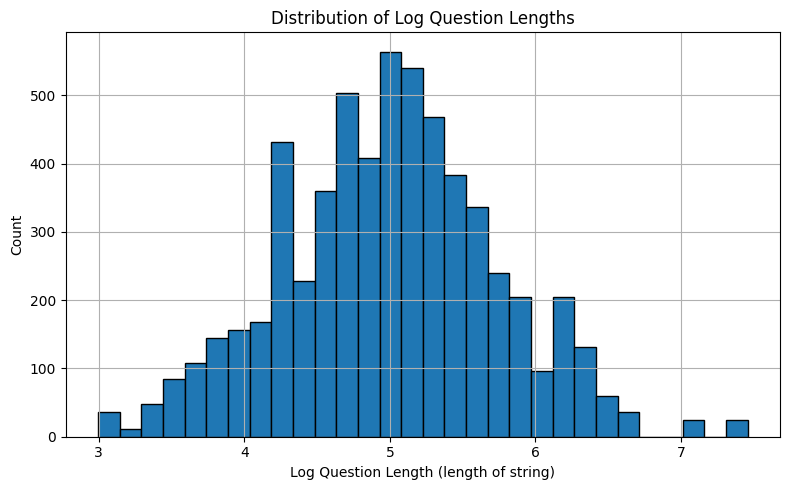

In [17]:
import matplotlib.pyplot as plt

# Create histogram
plt.figure(figsize=(8, 5))
plt.hist(np.log(predictor_df["question_length"]), bins=30, edgecolor='black')

plt.xlabel("Log Question Length (length of string)")
plt.ylabel("Count")
plt.title("Distribution of Log Question Lengths")
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()

### Plots of Accuracy

In [10]:
N_val = [1, 2, 4, 8, 16, 32]
mv_accuracy = np.mean(df_N8["indicator_maj_1"]), np.mean(df_N8["indicator_maj_2"]), np.mean(df_N8["indicator_maj_4"]), np.mean(df_N8["indicator_maj_8"]), np.mean(df_N8["indicator_maj_16"]), np.mean(df_N8["indicator_maj_32"])
BoN_vanilla_accuracy = np.mean(df_N8["indicator_naive_1"]), np.mean(df_N8["indicator_naive_2"]), np.mean(df_N8["indicator_naive_4"]), np.mean(df_N8["indicator_naive_8"]), np.mean(df_N8["indicator_naive_16"]), np.mean(df_N8["indicator_naive_32"])
BoN_weighted_accuracy = np.mean(df_N8["indicator_weighted_1"]), np.mean(df_N8["indicator_weighted_2"]), np.mean(df_N8["indicator_weighted_4"]), np.mean(df_N8["indicator_weighted_8"]), np.mean(df_N8["indicator_weighted_16"]), np.mean(df_N8["indicator_weighted_32"])
df_accuracy = pd.DataFrame({
    "N": N_val,
    "majority_vote": mv_accuracy,
    "BoN_vanilla": BoN_vanilla_accuracy,
    "BoN_weighted": BoN_weighted_accuracy
})

In [11]:
df_accuracy.head()

,N,majority_vote,BoN_vanilla,BoN_weighted
0,1,0.388,0.388,0.388
1,2,0.388,0.474,0.474
2,4,0.470,0.520,0.526
3,8,0.552,0.558,0.582
4,16,0.594,0.586,0.636


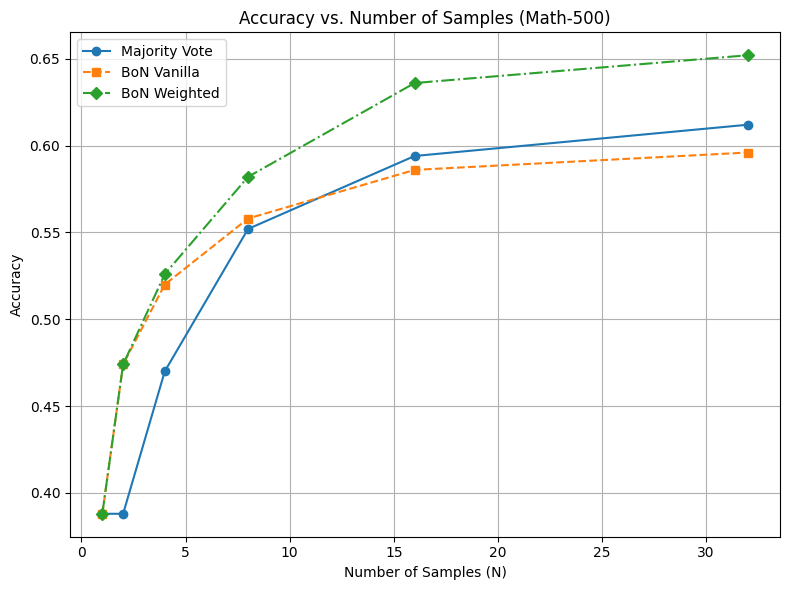

In [12]:
import matplotlib.pyplot as plt
import pandas as pd

# Create scatter plot of accuracy vs. number of samples
plt.figure(figsize=(8, 6))
plt.plot(df_accuracy["N"], df_accuracy["majority_vote"], 'o-', label="Majority Vote")
plt.plot(df_accuracy["N"], df_accuracy["BoN_vanilla"], 's--', label="BoN Vanilla")
plt.plot(df_accuracy["N"], df_accuracy["BoN_weighted"], 'D-.', label="BoN Weighted")

# Formatting
plt.xlabel("Number of Samples (N)")
plt.ylabel("Accuracy")
plt.title("Accuracy vs. Number of Samples (Math-500)")
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.savefig("accuracy_vs_N_Math500_Bo32.png", dpi=300)
plt.show()

In [18]:
# save to csv.
output_file = "/dccstor/gma2/jhjenny9/search-and-learn/data/Qwen/Qwen2.5-1.5B-Instruct/best_of_32/softlabel_predictor_df.csv"
# predictor_df.to_csv(output_file, index=False)

# read df.
predictor_df = pd.read_csv(output_file)

In [19]:
predictor_df.head(5)

,question,score,score_list,completion_tokens,sb_idx,correctness_1,correctness_2,correctness_4,correctness_8,correctness_16,sl,N,question_length,token_count,method_maj,method_naive,method_weighted
0,"Convert the point $(0,3)$ in rectangular coord...","[1.0, 0.0495605469, 0.921875, 1.0, 0.99609375,...","[1.0, 0.0495605469, 0.921875, 1.0, 0.99609375,...","[275, 268, 203, 194, 325, 301, 206, 260, 272, ...",0,[True],"[True, False]","[True, False, True, False]","[True, False, True, False, True, False, False,...","[True, False, True, False, True, False, False,...",0.64,2,161,8370,False,False,True
1,Define\n\[p = \sum_{k = 1}^\infty \frac{1}{k^2...,"[1.0, 1.0, 0.005065918, 0.62890625, 1.0, 0.816...","[1.0, 1.0, 0.005065918, 0.62890625, 1.0, 0.816...","[931, 938, 484, 1001, 600, 858, 964, 861, 817,...",1,[False],"[False, False]","[False, False, False, False]","[False, False, False, False, False, False, Fal...","[False, False, False, False, False, False, Fal...",0.30,2,217,26638,False,False,True
2,"If $f(x) = \frac{3x-2}{x-2}$, what is the valu...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[475, 561, 426, 431, 446, 515, 491, 431, 489, ...",2,[True],"[True, True]","[True, True, True, True]","[True, True, True, True, True, True, True, True]","[True, True, True, True, True, True, True, Tru...",0.92,2,113,13382,False,False,True
3,How many positive whole-number divisors does 1...,"[1.0, 1.0, 0.99609375, 0.9921875, 0.9296875, 1...","[1.0, 1.0, 0.99609375, 0.9921875, 0.9296875, 1...","[374, 370, 350, 363, 184, 555, 463, 178, 538, ...",3,[True],"[True, True]","[True, True, True, True]","[True, True, True, True, True, True, True, True]","[True, True, True, True, True, True, True, Tru...",0.92,2,54,11168,False,False,True
4,The results of a cross-country team's training...,"[1.0, 0.8515625, 0.98046875, 0.6796875, 0.5585...","[1.0, 0.8515625, 0.98046875, 0.6796875, 0.5585...","[450, 183, 485, 327, 362, 653, 493, 367, 401, ...",4,[True],"[True, False]","[True, False, False, False]","[True, False, False, False, False, False, True...","[True, False, False, False, False, False, True...",0.64,2,731,13495,False,False,True


### Prepare Features for Difficulty Probe.

In [20]:
import torch
from transformers import BertTokenizer, BertModel
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from tqdm import tqdm
from transformers import BertTokenizer, BertModel

/dccstor/gma2/jhjenny9/envs/model_serve/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [22]:
print("CUDA available:", torch.cuda.is_available())
print("CUDA device name:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "No GPU")
# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

CUDA available: False
CUDA device name: No GPU


In [23]:
local_model_path = "/u/jhjenny9/.cache/huggingface/models--bert-base-uncased/snapshots/86b5e0934494bd15c9632b12f734a8a67f723594"
tokenizer = BertTokenizer.from_pretrained(local_model_path)
model = BertModel.from_pretrained(local_model_path).to("cuda" if torch.cuda.is_available() else "cpu")
model.eval()

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSdpaSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False

In [24]:
tokenizer.add_special_tokens({'pad_token': '[PAD]'})
def get_cls_embedding(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True)
    with torch.no_grad():
        outputs = model(**inputs, output_hidden_states=True)
    cls_embedding = outputs.last_hidden_state[:, 0, :]  # CLS token is at position 0
    return cls_embedding.squeeze().numpy()

In [25]:
# Create train/test split based on 'sb_idx' (query identifier)
from sklearn.model_selection import train_test_split

unique_sb_idx = predictor_df['sb_idx'].unique()

# Split sb_idx into train/test
sb_idx_train, sb_idx_test = train_test_split(
    unique_sb_idx,
    test_size=0.20, # .15
    random_state=6
)

# Divide queries (represented by sb_idx) into train and test
df_train = predictor_df[predictor_df['sb_idx'].isin(sb_idx_train)].reset_index(drop=True)
df_test = predictor_df[predictor_df['sb_idx'].isin(sb_idx_test)].reset_index(drop=True)

In [26]:
# (Training Data) Extract features: CLS + decoding parameters
cls_features = []

## Scaling factors
NUM_SAMPLES_SCALE = 1.0 
QUESTION_LENGTH_SCALE = 1.0
METHOD_SCALE = 1.0

for _, row in df_train.iterrows():
    cls_vec = get_cls_embedding(row["question"])  # e.g., shape (768,)
    
    # Scalar features
    num_samples = row["N"] * NUM_SAMPLES_SCALE
    question_length = np.log(row["question_length"]) * QUESTION_LENGTH_SCALE
    method_maj = row["method_maj"] * METHOD_SCALE
    method_naive = row["method_naive"] * METHOD_SCALE
    method_weighted = row["method_weighted"] * METHOD_SCALE

    # Concatenate features
    features = np.concatenate([
        cls_vec, 
        [num_samples, question_length, method_maj, method_naive, method_weighted]
    ]) 

    cls_features.append(features)

In [27]:
X_train = np.array(cls_features)
y_train = df_train["sl"].values

### Plotting Feature Importance.

In [28]:
# split high-dimensional CLS and interpretable features
cls_dim = len(cls_vec)
cls_part = X_train[:, :cls_dim]
named_features = pd.DataFrame(
    X_train[:, cls_dim:],  # shape (n_samples, 5)
    columns=["num_samples", "question_length", "method_maj", "method_naive", "method_weighted"]
)

In [32]:
type(y_train[0])

numpy.float64

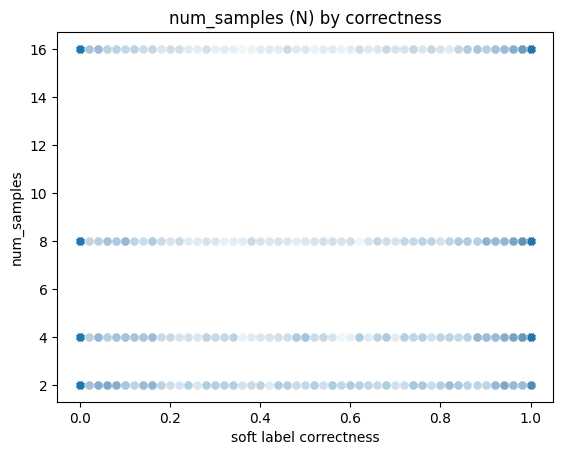

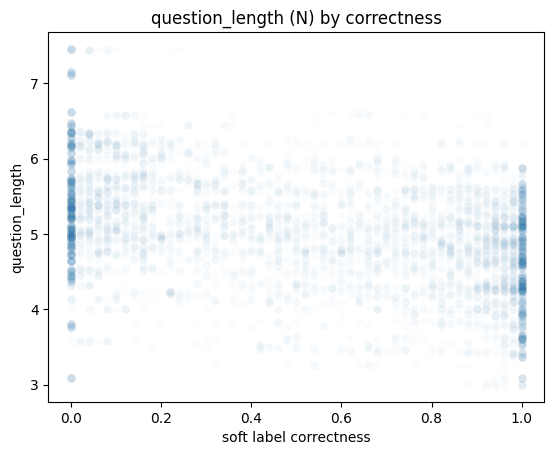

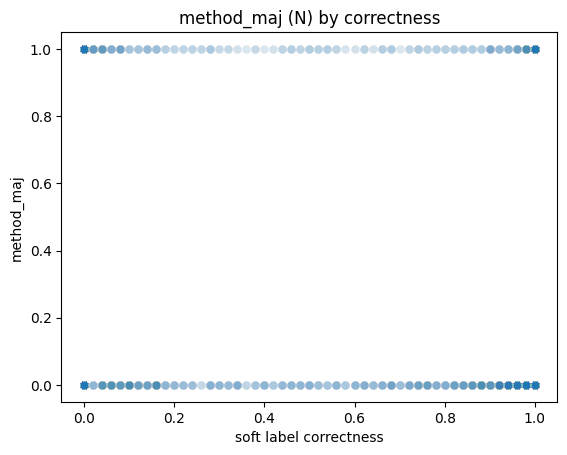

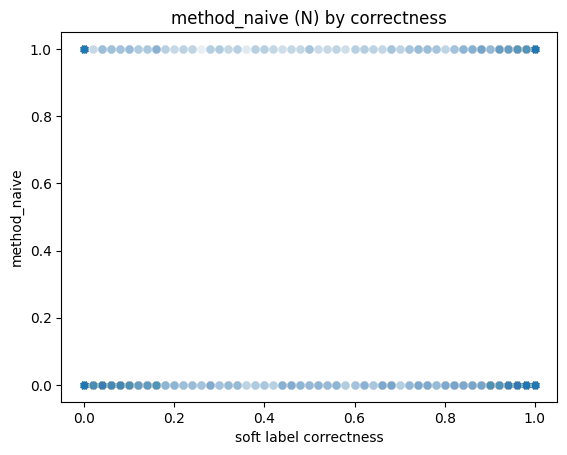

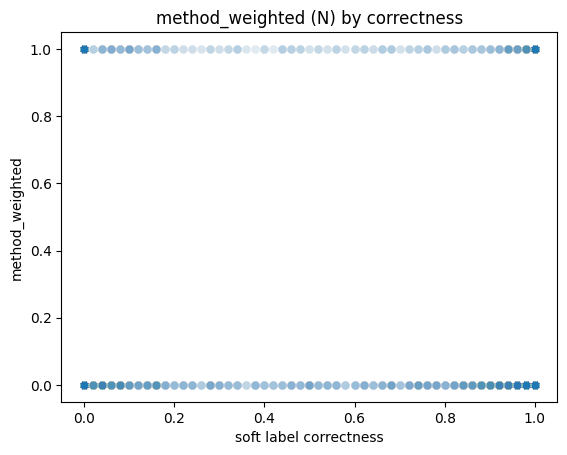

In [37]:
import seaborn as sns

for col in named_features.columns:
    sns.scatterplot(x=y_train, y=named_features[col], alpha=0.02)
    plt.title(f"{col} (N) by correctness")
    plt.xlabel("soft label correctness")
    plt.ylabel(col)
    plt.show()

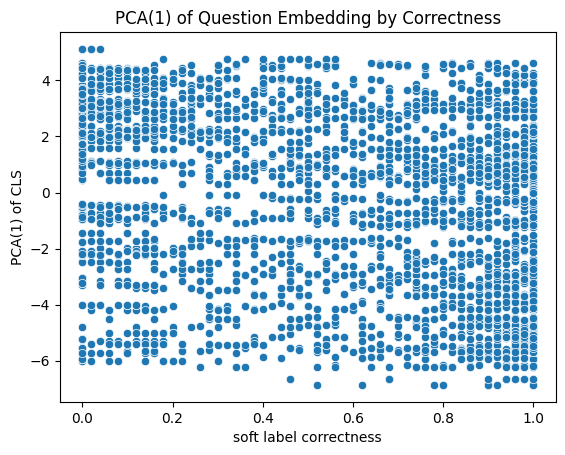

In [39]:
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# Reduce to 1D or 2D
pca = PCA(n_components=1)
cls_1d = pca.fit_transform(cls_part)[:, 0]

# Plot 1D PCA of CLS
sns.scatterplot(x=y_train, y=cls_1d)
plt.title("PCA(1) of Question Embedding by Correctness")
plt.xlabel("soft label correctness")
plt.ylabel("PCA(1) of CLS")
plt.show()

### Create Testing Data

In [40]:
# (Testing Data) Extract features: CLS + decoding parameters
cls_features = []

NUM_SAMPLES_SCALE = 1.0
QUESTION_LENGTH_SCALE = 1.0
METHOD_SCALE = 1.0

for _, row in df_test.iterrows():
    cls_vec = get_cls_embedding(row["question"])  # e.g., shape (768,)
    
    # Scalar features
    num_samples = row["N"] * NUM_SAMPLES_SCALE
    question_length = np.log(row["question_length"]) * QUESTION_LENGTH_SCALE
    method_maj = row["method_maj"] * METHOD_SCALE
    method_naive = row["method_naive"] * METHOD_SCALE
    method_weighted = row["method_weighted"] * METHOD_SCALE

    # Concatenate features
    features = np.concatenate([cls_vec, [num_samples, question_length, method_maj, method_naive, method_weighted]]) 
    cls_features.append(features)

In [41]:
X_test = np.array(cls_features)
# y_test = df_test["indicator"].values.astype(int)
y_test = df_test["sl"].values

### Train MLP.

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

In [43]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [44]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((4800, 773), (4800,), (1200, 773), (1200,))

### Create Custom MLP (soft labels)

In [45]:
import torch.nn as nn                        # for neural network layers, loss functions, etc.
from torch.utils.data import Dataset, DataLoader     # for batching and shuffling datasets
import torch.optim as optim

In [46]:
# ----- 2. Dataset Definition -----
class SoftLabelDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.float32).unsqueeze(1)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# ----- 3. Dataloaders -----
train_dataset = SoftLabelDataset(X_train, y_train)
val_dataset = SoftLabelDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)

# ----- 4. MLP Model -----
class MLP(nn.Module):
    def __init__(self, input_dim):
        super(MLP, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Dropout(0.5), 
            nn.Linear(32, 1),
            nn.Sigmoid()  # needed for binary cross-entropy with soft targets
        )

    def forward(self, x):
        return self.model(x)

model = MLP(input_dim=773)

# ----- 5. Loss and Optimizer -----
criterion = nn.BCELoss()  # for soft binary targets
optimizer = optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-5)

In [47]:
# ----- 6. Training Loop -----
num_epochs = 10

for epoch in range(num_epochs):
    # Training
    model.train()
    running_loss = 0.0
    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    # Validation
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for val_X, val_y in val_loader:
            val_preds = model(val_X)
            val_loss += criterion(val_preds, val_y).item()

    print(f"Epoch {epoch+1}, Train Loss: {running_loss:.4f}, Val Loss: {val_loss:.4f}")

Epoch 1, Train Loss: 48.1895, Val Loss: 12.0408
Epoch 2, Train Loss: 44.6003, Val Loss: 11.6390
Epoch 3, Train Loss: 42.1444, Val Loss: 12.1305
Epoch 4, Train Loss: 40.5968, Val Loss: 11.6819
Epoch 5, Train Loss: 38.6808, Val Loss: 12.1586
Epoch 6, Train Loss: 37.5153, Val Loss: 12.4470
Epoch 7, Train Loss: 36.3820, Val Loss: 12.4789
Epoch 8, Train Loss: 34.7513, Val Loss: 12.6778
Epoch 9, Train Loss: 33.8585, Val Loss: 12.4333
Epoch 10, Train Loss: 32.6785, Val Loss: 12.8263


#### Make Predictions on Test (soft label response).

In [137]:
model.eval()
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)

with torch.no_grad():
    softLabel_Preds = model(X_test_tensor)

In [138]:
softLabel_preds_numpy = softLabel_Preds.squeeze().cpu().numpy()
softLabel_preds_numpy

array([0.75798583, 0.52198493, 0.31180784, ..., 0.8072295 , 0.7070034 ,
       0.59354556], dtype=float32)

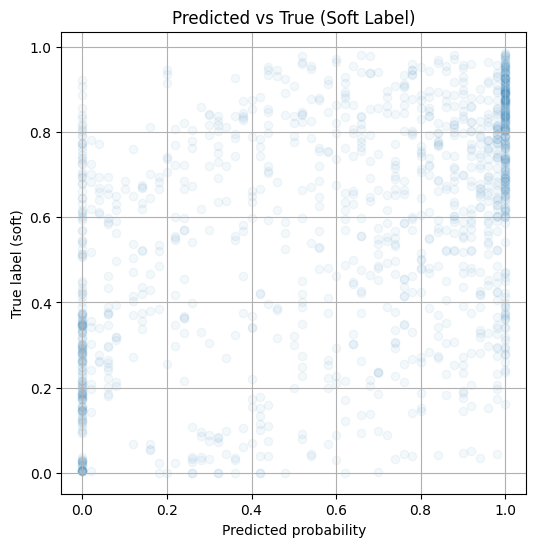

In [140]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
plt.scatter(y_test, softLabel_preds_numpy, alpha=0.05)
plt.xlabel("Predicted probability")
plt.ylabel("True label (soft)")
plt.title("Predicted vs True (Soft Label)")
plt.grid(True)
plt.show()

### Add soft label predictions to test set

In [141]:
df_test['predicted_prob'] = softLabel_preds_numpy # soft label predictions.
# df_train['predicted_prob'] = softLabel_preds_numpy

In [53]:
# Dynamically extract the correctness_N column for each row
df_test["correctness"] = df_test.apply(lambda row: row[f"correctness_{row['N']}"], axis=1)

In [118]:
df_train['predicted_prob']

0       0.624089
1       0.292202
2       0.661811
3       0.301291
4       0.900295
          ...   
4795    0.864562
4796    0.182283
4797    0.636753
4798    0.247734
4799    0.320693
Name: predicted_prob, Length: 4800, dtype: float32

In [57]:
# there should be 18 different BoN configurations for each query in the test set.
df_train.groupby('sb_idx').size().reset_index(name='count')

,sb_idx,count
0,0,12
1,1,12
2,3,12
3,4,12
4,5,12
...,...,...
395,493,12
396,494,12
397,496,12
398,497,12


In [64]:
# Transform method columns into a single 'method' column.

def decode_method(row):
    if row["method_maj"]:
        return "majority"
    elif row["method_naive"]:
        return "naive"
    elif row["method_weighted"]:
        return "weighted"
    else:
        return "unknown"

# Apply the function row-wise
# df_test["method"] = df_test.apply(decode_method, axis=1)
# df_train["method"] = df_train.apply(decode_method, axis=1)

# drop the one-hot columns
# df_test = df_test.drop(columns=["method_maj", "method_naive", "method_weighted"])
# df_train = df_train.drop(columns=["method_maj", "method_naive", "method_weighted"])

In [119]:
df_train.head()

# # save test set with soft labels.
# output_file = "/dccstor/gma2/jhjenny9/search-and-learn/data/Qwen/Qwen2.5-1.5B-Instruct/best_of_32/softlabel_test_set.csv"
# df_test.to_csv(output_file, index=False)
# print(f"Test set with soft labels saved to {output_file}")

,question,score,score_list,completion_tokens,sb_idx,correctness_1,correctness_2,correctness_4,correctness_8,correctness_16,sl,N,question_length,token_count,method,predicted_prob
0,"Convert the point $(0,3)$ in rectangular coord...","[1.0, 0.0495605469, 0.921875, 1.0, 0.99609375,...","[1.0, 0.0495605469, 0.921875, 1.0, 0.99609375,...","[275, 268, 203, 194, 325, 301, 206, 260, 272, ...",0,[True],"[True, False]","[True, False, True, False]","[True, False, True, False, True, False, False,...","[True, False, True, False, True, False, False,...",0.64,2,161,543,weighted,0.624089
1,Define\n\[p = \sum_{k = 1}^\infty \frac{1}{k^2...,"[1.0, 1.0, 0.005065918, 0.62890625, 1.0, 0.816...","[1.0, 1.0, 0.005065918, 0.62890625, 1.0, 0.816...","[931, 938, 484, 1001, 600, 858, 964, 861, 817,...",1,[False],"[False, False]","[False, False, False, False]","[False, False, False, False, False, False, Fal...","[False, False, False, False, False, False, Fal...",0.30,2,217,1869,weighted,0.292202
2,How many positive whole-number divisors does 1...,"[1.0, 1.0, 0.99609375, 0.9921875, 0.9296875, 1...","[1.0, 1.0, 0.99609375, 0.9921875, 0.9296875, 1...","[374, 370, 350, 363, 184, 555, 463, 178, 538, ...",3,[True],"[True, True]","[True, True, True, True]","[True, True, True, True, True, True, True, True]","[True, True, True, True, True, True, True, Tru...",0.92,2,54,744,weighted,0.661811
3,The results of a cross-country team's training...,"[1.0, 0.8515625, 0.98046875, 0.6796875, 0.5585...","[1.0, 0.8515625, 0.98046875, 0.6796875, 0.5585...","[450, 183, 485, 327, 362, 653, 493, 367, 401, ...",4,[True],"[True, False]","[True, False, False, False]","[True, False, False, False, False, False, True...","[True, False, False, False, False, False, True...",0.64,2,731,633,weighted,0.301291
4,A regular hexagon can be divided into six equi...,"[1.0, 1.0, 1.0, 0.9921875, 1.0, 0.0060119629, ...","[1.0, 1.0, 1.0, 0.9921875, 1.0, 0.0060119629, ...","[285, 204, 258, 175, 168, 93, 313, 335, 236, 2...",5,[True],"[True, True]","[True, True, True, False]","[True, True, True, False, True, False, True, F...","[True, True, True, False, True, False, True, F...",0.86,2,177,489,weighted,0.900295


In [103]:
# read softlabel test set.
df_test = pd.read_csv(output_file)
df_test.head()

,question,score,score_list,completion_tokens,sb_idx,correctness_1,correctness_2,correctness_4,correctness_8,correctness_16,sl,N,question_length,token_count,method_maj,method_naive,method_weighted,predicted_prob,correctness,method
0,"If $f(x) = \frac{3x-2}{x-2}$, what is the valu...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[475, 561, 426, 431, 446, 515, 491, 431, 489, ...",2,[True],"[True, True]","[True, True, True, True]","[True, True, True, True, True, True, True, True]","[True, True, True, True, True, True, True, Tru...",0.92,2,113,13382,False,False,True,0.813906,"[True, True]",weighted
1,What is the least positive integer multiple of...,"[0.0084228516, 0.0031738281, 0.0012817383, 0.7...","[0.0084228516, 0.0031738281, 0.0012817383, 0.7...","[273, 416, 447, 300, 447, 561, 310, 561, 349, ...",10,[False],"[False, False]","[False, False, False, False]","[False, False, False, False, False, False, Fal...","[False, False, False, False, False, False, Fal...",0.14,2,99,15904,False,False,True,0.478578,"[False, False]",weighted
2,"The proper divisors of 12 are 1, 2, 3, 4 and 6...","[0.0615234375, 0.9921875, 0.96875, 0.72265625,...","[0.0615234375, 0.9921875, 0.96875, 0.72265625,...","[461, 274, 585, 577, 433, 385, 429, 541, 270, ...",12,[False],"[False, False]","[False, False, False, False]","[False, False, False, False, False, False, Tru...","[False, False, False, False, False, False, Tru...",0.08,2,215,13838,False,False,True,0.273166,"[False, False]",weighted
3,The volume of the cylinder shown is $45\pi$ cu...,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[230, 156, 169, 205, 207, 204, 163, 226, 234, ...",13,[True],"[True, True]","[True, True, True, True]","[True, True, True, True, True, True, True, True]","[True, True, True, True, True, True, True, Tru...",1.00,2,384,6769,False,False,True,0.255237,"[True, True]",weighted
4,Compute: $1-2+3-4+5- \dots +99-100$.,"[0.578125, 1.0, 1.0, 0.0344238281, 0.15625, 1....","[0.578125, 1.0, 1.0, 0.0344238281, 0.15625, 1....","[494, 374, 179, 712, 246, 232, 346, 327, 166, ...",16,[False],"[False, True]","[False, True, True, False]","[False, True, True, False, False, True, False,...","[False, True, True, False, False, True, False,...",0.84,2,36,9425,False,False,True,0.507618,"[False, True]",weighted


In [120]:
# turn completion_tokens into a list of ints.
df_test["completion_tokens"] = df_test["completion_tokens"].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
df_train["completion_tokens"] = df_train["completion_tokens"].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

In [121]:
# compute token counts.
df_test["token_count"] = df_test.apply(lambda row: sum(row["completion_tokens"][:row["N"]]), axis=1)
df_train["token_count"] = df_train.apply(lambda row: sum(row["completion_tokens"][:row["N"]]), axis=1)

In [122]:
df_train.head(5)

,question,score,score_list,completion_tokens,sb_idx,correctness_1,correctness_2,correctness_4,correctness_8,correctness_16,sl,N,question_length,token_count,method,predicted_prob
0,"Convert the point $(0,3)$ in rectangular coord...","[1.0, 0.0495605469, 0.921875, 1.0, 0.99609375,...","[1.0, 0.0495605469, 0.921875, 1.0, 0.99609375,...","[275, 268, 203, 194, 325, 301, 206, 260, 272, ...",0,[True],"[True, False]","[True, False, True, False]","[True, False, True, False, True, False, False,...","[True, False, True, False, True, False, False,...",0.64,2,161,543,weighted,0.624089
1,Define\n\[p = \sum_{k = 1}^\infty \frac{1}{k^2...,"[1.0, 1.0, 0.005065918, 0.62890625, 1.0, 0.816...","[1.0, 1.0, 0.005065918, 0.62890625, 1.0, 0.816...","[931, 938, 484, 1001, 600, 858, 964, 861, 817,...",1,[False],"[False, False]","[False, False, False, False]","[False, False, False, False, False, False, Fal...","[False, False, False, False, False, False, Fal...",0.30,2,217,1869,weighted,0.292202
2,How many positive whole-number divisors does 1...,"[1.0, 1.0, 0.99609375, 0.9921875, 0.9296875, 1...","[1.0, 1.0, 0.99609375, 0.9921875, 0.9296875, 1...","[374, 370, 350, 363, 184, 555, 463, 178, 538, ...",3,[True],"[True, True]","[True, True, True, True]","[True, True, True, True, True, True, True, True]","[True, True, True, True, True, True, True, Tru...",0.92,2,54,744,weighted,0.661811
3,The results of a cross-country team's training...,"[1.0, 0.8515625, 0.98046875, 0.6796875, 0.5585...","[1.0, 0.8515625, 0.98046875, 0.6796875, 0.5585...","[450, 183, 485, 327, 362, 653, 493, 367, 401, ...",4,[True],"[True, False]","[True, False, False, False]","[True, False, False, False, False, False, True...","[True, False, False, False, False, False, True...",0.64,2,731,633,weighted,0.301291
4,A regular hexagon can be divided into six equi...,"[1.0, 1.0, 1.0, 0.9921875, 1.0, 0.0060119629, ...","[1.0, 1.0, 1.0, 0.9921875, 1.0, 0.0060119629, ...","[285, 204, 258, 175, 168, 93, 313, 335, 236, 2...",5,[True],"[True, True]","[True, True, True, False]","[True, True, True, False, True, False, True, F...","[True, True, True, False, True, False, True, F...",0.86,2,177,489,weighted,0.900295


In [101]:
config_summary_df_test = df_test.groupby(["N", "method"])[
    ["sl", "token_count"]
].mean().reset_index()

What I was doing before was comparing the adaptive router against the static config training data, rather than against the test data.

In [102]:
config_summary_df_test.head(20)

,N,method,sl,token_count
0,2,majority,0.4220,1000.61
1,2,naive,0.5278,1000.61
2,2,weighted,0.5278,1000.61
3,4,majority,0.5138,1967.26
4,4,naive,0.6062,1967.26
5,4,weighted,0.6052,1967.26
6,8,majority,0.6000,3952.01
7,8,naive,0.6544,3952.01
8,8,weighted,0.6644,3952.01
9,16,majority,0.6472,7925.87


In [71]:
config_summary_df = df_train.groupby(["N", "method"])[
    ["sl", "token_count"]
].mean().reset_index()

In [72]:
config_summary_df.head(20)

,N,method,sl,token_count
0,2,majority,0.37525,1049.5950
1,2,naive,0.46070,1049.5950
2,2,weighted,0.46070,1049.5950
3,4,majority,0.45030,2127.3000
4,4,naive,0.51610,2127.3000
5,4,weighted,0.51740,2127.3000
6,8,majority,0.50805,4169.8125
7,8,naive,0.55705,4169.8125
8,8,weighted,0.55985,4169.8125
9,16,majority,0.54235,8413.5050


### Plot of Accuracies per Configuration
Config Summary DF.

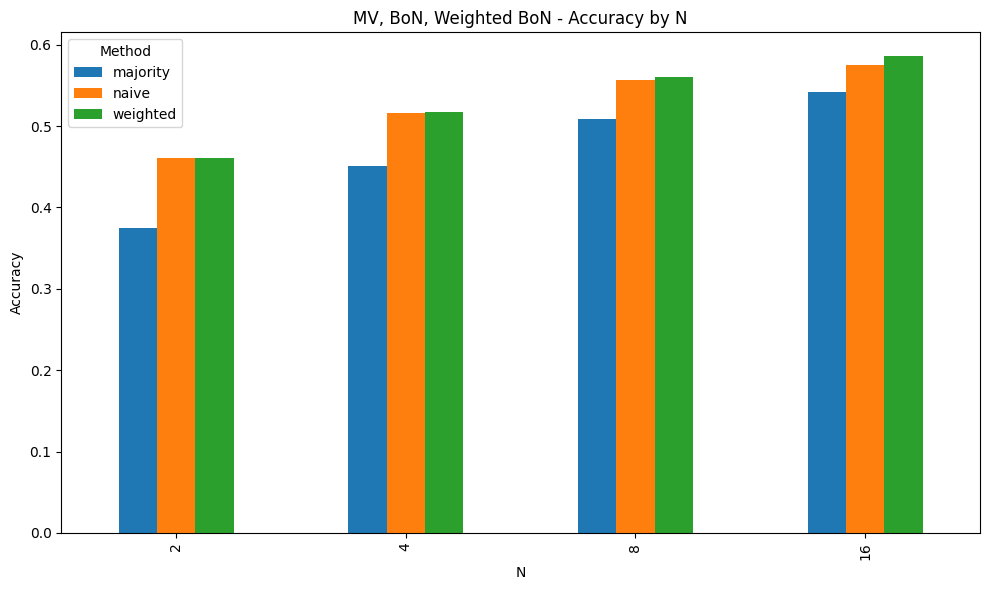

In [73]:
### TRAINING DF
# Pivot for plotting
pivot_df = config_summary_df.pivot(index="N", columns="method", values="sl")

# Plot
pivot_df.plot(kind="bar", figsize=(10, 6))

plt.title("MV, BoN, Weighted BoN - Accuracy by N")
plt.xlabel("N")
plt.ylabel("Accuracy")
plt.legend(title="Method")
plt.tight_layout()
plt.show()

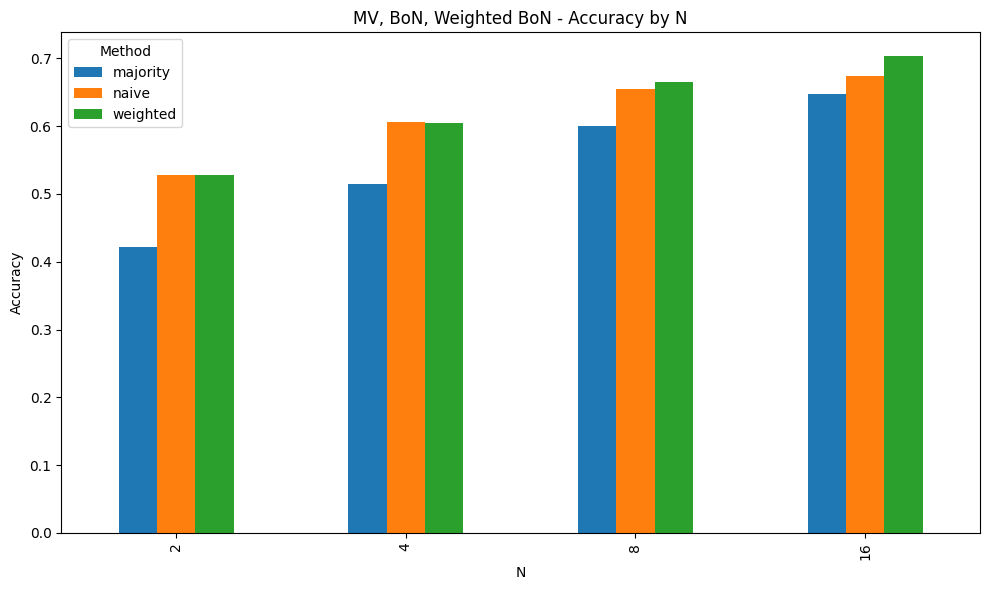

In [ ]:
# TEST DF
pivot_df = config_summary_df_test.pivot(index="N", columns="method", values="sl")

# Plot
pivot_df.plot(kind="bar", figsize=(10, 6))

plt.title("MV, BoN, Weighted BoN - Accuracy by N")
plt.xlabel("N")
plt.ylabel("Accuracy")
plt.legend(title="Method")
plt.tight_layout()
plt.show()

### Optimal-Utility Router

$$\text{Utility}(x, m) = \hat{a}_m(x) - \lambda \cdot \text{Cost}_m(x)$$

$$\text{Query-adaptive}(x, m) = \argmax_m \; \text{Utility}(x, m)

Input: A dataframe that contains rows for different settings (beam size, beam width, chunk size, etc.) and includes: an accuracy column, an avg_cot_token_count column (which is the cost), and a sb_idx column (which is the query).

A parameter, lambda, that controls how much the user is willing to tradeoff accuracy and cost.

For each group (i.e., all rows of the same query, or sb_idx):

It computes a utility value for each row:

$$\text{Utility}(x, m) = \hat{a}_m(x) - \lambda \cdot \text{Cost}_m(x)$$

It finds the row with the highest utility in that group.

Output:
A new DataFrame where each row corresponds to a query and contains:
the best utility found, the accuracy, and cost for that best-performing configuration.

In [123]:
def compute_max_utility_pred(df, lambda_):
    def get_max_utility(group): # verified correctness. (July 22nd)
        group = group.copy()
        group["utility"] = group["predicted_prob"] - lambda_ * group["token_count"]
        # print(group["predicted_prob"], group["indicator"], group["token_count"], group["N"], group["method"])
        idx_max = group["utility"].idxmax()
        # print("max utility index is: ", idx_max)
        return pd.Series({
            "max_utility": group.loc[idx_max, "utility"],
            "max_predicted_prob": group.loc[idx_max, "predicted_prob"],
            "sl": group.loc[idx_max, "sl"], # indicator that keeps track of whether the answer is correct.
            "max_cost": group.loc[idx_max, "token_count"],
            "N": group.loc[idx_max, "N"],
            "method": group.loc[idx_max, "method"],
        })

    result_df = df.groupby("sb_idx").apply(get_max_utility).reset_index()
    return result_df

#### Let's see what the router looks like for lambda = 0.

In [144]:
lambda_value = 0
# for large lambda values, the max-accuracy is 0/1 because N is small in BoN.
adaptive_router_0_lambda = compute_max_utility_pred(df_test, lambda_value)
adaptive_router_0_lambda.head(20) # 100 questions in the test set.

/tmp/ipykernel_1340910/3088901097.py:17: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result_df = df.groupby("sb_idx").apply(get_max_utility).reset_index()


,sb_idx,max_utility,max_predicted_prob,sl,max_cost,N,method
0,2,0.873925,0.873925,1.00,6920,16,weighted
1,10,0.755780,0.755780,0.56,7034,16,weighted
2,12,0.467152,0.467152,0.16,7764,16,weighted
3,13,0.422829,0.422829,1.00,3231,16,naive
4,16,0.736094,0.736094,1.00,4970,16,weighted
5,28,0.792225,0.792225,0.94,5767,16,weighted
6,30,0.874336,0.874336,1.00,4911,16,weighted
7,32,0.524022,0.524022,0.98,5602,16,weighted
8,44,0.557277,0.557277,0.96,6685,16,weighted
9,53,0.455799,0.455799,0.76,4325,16,naive


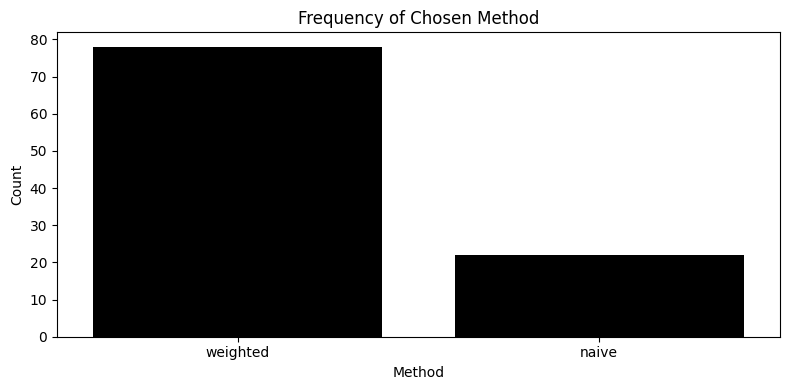

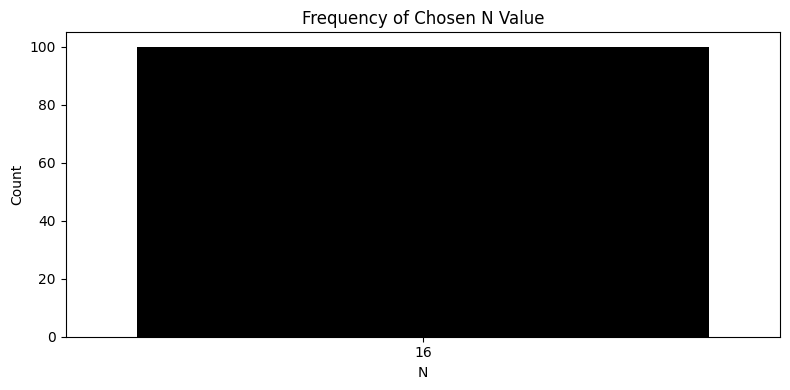

In [145]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot: Histogram of method counts
plt.figure(figsize=(8, 4))
sns.countplot(data=adaptive_router_0_lambda, x="method", order=adaptive_router_0_lambda["method"].value_counts().index, color="black")
plt.title("Frequency of Chosen Method")
plt.xlabel("Method")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# Plot: Histogram of N values
plt.figure(figsize=(8, 4))
sns.countplot(data=adaptive_router_0_lambda, x="N", order=sorted(adaptive_router_0_lambda["N"].unique()), color="black")
plt.title("Frequency of Chosen N Value")
plt.xlabel("N")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

In [146]:
# average of indicator column to get the percentage of questions the router answers correctly.
average_accuracy = adaptive_router_0_lambda["sl"].mean()
average_cost = adaptive_router_0_lambda["max_cost"].mean()
print(f"Average accuracy for lambda={lambda_value} is {average_accuracy:.4f}, average cost is: {average_cost:.4f}")
# print(f"Average cost is: {average_cost:.4f}")

Average accuracy for lambda=0 is 0.6976, average cost is: 7925.8700


In [147]:
# Sweep over lambda values
lambda_list = np.logspace(-50, -1, num=200) 

In [148]:
results = []

for lambda_value in lambda_list:
    adaptive_router = compute_max_utility_pred(df_test, lambda_value)
    # adaptive_router = compute_max_utility_pred(df_train, lambda_value)
    average_accuracy = adaptive_router["sl"].mean() # accuracy as a percentage of questions (out of all questions in the test set) answered correctly.
    average_cost = adaptive_router["max_cost"].mean()
    average_predicted_prob = adaptive_router["max_predicted_prob"].mean()
    
    results.append({
        "lambda": lambda_value,
        "sl": average_accuracy,
        "token_count": average_cost,
        "predicted_prob": average_predicted_prob,
    })

# Convert to DataFrame
query_adaptive_df = pd.DataFrame(results)
print(query_adaptive_df)

/tmp/ipykernel_1340910/3088901097.py:17: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result_df = df.groupby("sb_idx").apply(get_max_utility).reset_index()
/tmp/ipykernel_1340910/3088901097.py:17: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result_df = df.groupby("sb_idx").apply(get_max_utility).reset_index()
/tmp/ipykernel_1340910/3088901097.py:17: FutureWarning: DataFrameGroupBy.apply operated on the grouping co

           lambda      sl  token_count  predicted_prob
0    1.000000e-50  0.6976      7925.87        0.664487
1    1.762914e-50  0.6976      7925.87        0.664487
2    3.107866e-50  0.6976      7925.87        0.664487
3    5.478901e-50  0.6976      7925.87        0.664487
4    9.658832e-50  0.6976      7925.87        0.664487
..            ...     ...          ...             ...
195  1.035322e-02  0.5278      1000.61        0.546381
196  1.825183e-02  0.5278      1000.61        0.546381
197  3.217642e-02  0.5278      1000.61        0.546381
198  5.672426e-02  0.5278      1000.61        0.546381
199  1.000000e-01  0.5278      1000.61        0.546381

[200 rows x 4 columns]


/tmp/ipykernel_1340910/3088901097.py:17: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result_df = df.groupby("sb_idx").apply(get_max_utility).reset_index()


In [149]:
# the routed queries.
query_adaptive_df.head()

,lambda,sl,token_count,predicted_prob
0,1.000000e-50,0.6976,7925.87,0.664487
1,1.762914e-50,0.6976,7925.87,0.664487
2,3.107866e-50,0.6976,7925.87,0.664487
3,5.478901e-50,0.6976,7925.87,0.664487
4,9.658832e-50,0.6976,7925.87,0.664487


In [150]:
# outer join on the shared columns ("accuracy", "avg_cot_token_count")
query_optimal_static_df = pd.merge(
    query_adaptive_df,
    # config_summary_df,
    config_summary_df_test,
    on=["sl", "token_count"],
    how="outer"
)
query_optimal_static_df.head()
# change NaN to -1 for plotting purposes.
query_optimal_static_df = query_optimal_static_df.fillna(-1)

In [151]:
query_optimal_static_df.head()


,lambda,sl,token_count,predicted_prob,N,method
0,-1.000000,0.4220,1000.61,-1.000000,2.0,majority
1,-1.000000,0.5138,1967.26,-1.000000,4.0,majority
2,0.001072,0.5278,1000.61,0.546381,2.0,naive
3,0.001072,0.5278,1000.61,0.546381,2.0,weighted
4,0.001890,0.5278,1000.61,0.546381,2.0,naive


['majorityx2.0', 'majorityx4.0', 'naivex2.0', 'weightedx2.0', 'naivex2.0', 'weightedx2.0', 'naivex2.0', 'weightedx2.0', 'naivex2.0', 'weightedx2.0', 'naivex2.0', 'weightedx2.0', 'naivex2.0', 'weightedx2.0', 'naivex2.0', 'weightedx2.0', 'naivex2.0', 'weightedx2.0', 'naivex2.0', 'weightedx2.0', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'majorityx8.0', 'weightedx4.0', 'naivex4.0', 'qa', 'majorityx16.0', 'naivex8.0', 'qa', 'weightedx8.0', 'naivex16.0', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', '

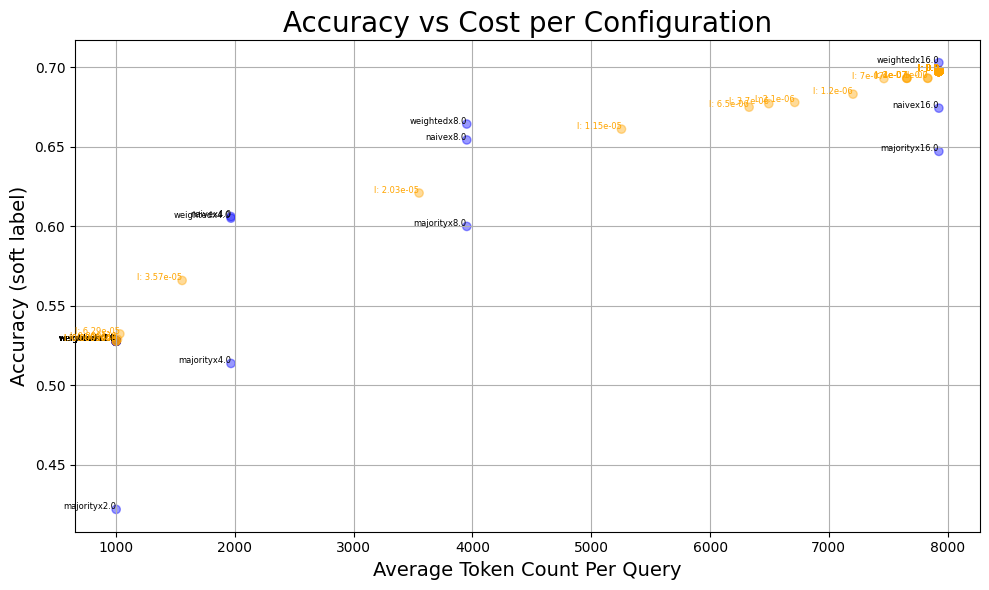

In [152]:
# Create color labels and text labels
colors = ['orange' if (row['method']) == -1 else 'blue'
          for _, row in query_optimal_static_df.iterrows()]

text_labels = ["qa" if (row['method']) == -1
               else f"{row['method']}x{row['N']}"
               for _, row in query_optimal_static_df.iterrows()]

print(text_labels)
plt.figure(figsize=(10, 6))
plt.scatter(query_optimal_static_df["token_count"], query_optimal_static_df["sl"], color=colors, alpha=0.4)

# Annotate each point
for i, label in enumerate(text_labels):
    if label != "qa":
        plt.annotate(label,
                    (query_optimal_static_df["token_count"][i], query_optimal_static_df["sl"][i]),
                    textcoords="offset points", xytext=(0, 0), ha='right', fontsize=6, color='black')
    elif label == "qa":
        plt.annotate(f"l: {round(query_optimal_static_df["lambda"][i], 7)}",
                    (query_optimal_static_df["token_count"][i], query_optimal_static_df["sl"][i]),
                    textcoords="offset points", xytext=(0, 0), ha='right', fontsize=6, color='orange')

plt.xlabel("Average Token Count Per Query", fontsize=14)
plt.ylabel("Accuracy (soft label)", fontsize=14)
plt.title("Accuracy vs Cost per Configuration", fontsize=20)
plt.grid(True)
plt.tight_layout()

['majorityx2.0', 'majorityx4.0', 'naivex2.0', 'weightedx2.0', 'naivex2.0', 'weightedx2.0', 'naivex2.0', 'weightedx2.0', 'naivex2.0', 'weightedx2.0', 'naivex2.0', 'weightedx2.0', 'naivex2.0', 'weightedx2.0', 'naivex2.0', 'weightedx2.0', 'naivex2.0', 'weightedx2.0', 'naivex2.0', 'weightedx2.0', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'majorityx8.0', 'weightedx4.0', 'naivex4.0', 'qa', 'majorityx16.0', 'naivex8.0', 'qa', 'weightedx8.0', 'naivex16.0', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', '

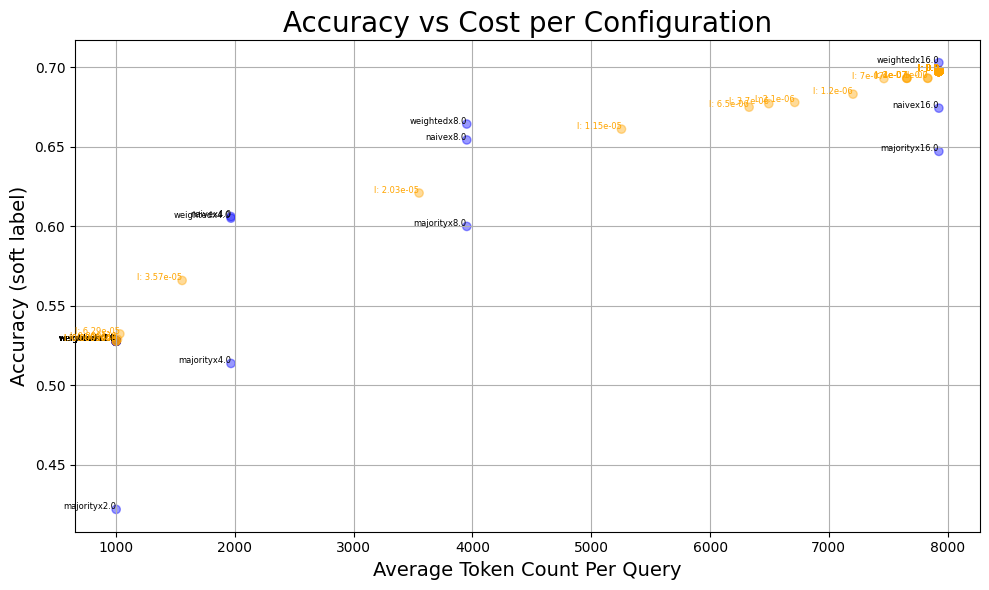

In [110]:
# Create color labels and text labels
colors = ['orange' if (row['method']) == -1 else 'blue'
          for _, row in query_optimal_static_df.iterrows()]

text_labels = ["qa" if (row['method']) == -1
               else f"{row['method']}x{row['N']}"
               for _, row in query_optimal_static_df.iterrows()]

print(text_labels)
plt.figure(figsize=(10, 6))
plt.scatter(query_optimal_static_df["token_count"], query_optimal_static_df["sl"], color=colors, alpha=0.4)

# Annotate each point
for i, label in enumerate(text_labels):
    if label != "qa":
        plt.annotate(label,
                    (query_optimal_static_df["token_count"][i], query_optimal_static_df["sl"][i]),
                    textcoords="offset points", xytext=(0, 0), ha='right', fontsize=6, color='black')
    elif label == "qa":
        plt.annotate(f"l: {round(query_optimal_static_df["lambda"][i], 7)}",
                    (query_optimal_static_df["token_count"][i], query_optimal_static_df["sl"][i]),
                    textcoords="offset points", xytext=(0, 0), ha='right', fontsize=6, color='orange')

plt.xlabel("Average Token Count Per Query", fontsize=14)
plt.ylabel("Accuracy (soft label)", fontsize=14)
plt.title("Accuracy vs Cost per Configuration", fontsize=20)
plt.grid(True)
plt.tight_layout()

['majorityx2.0', 'majorityx4.0', 'naivex2.0', 'weightedx2.0', 'majorityx8.0', 'naivex4.0', 'weightedx4.0', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'majorityx16.0', 'naivex8.0', 'weightedx8.0', 'qa', 'naivex16.0', 'weightedx16.0', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa']


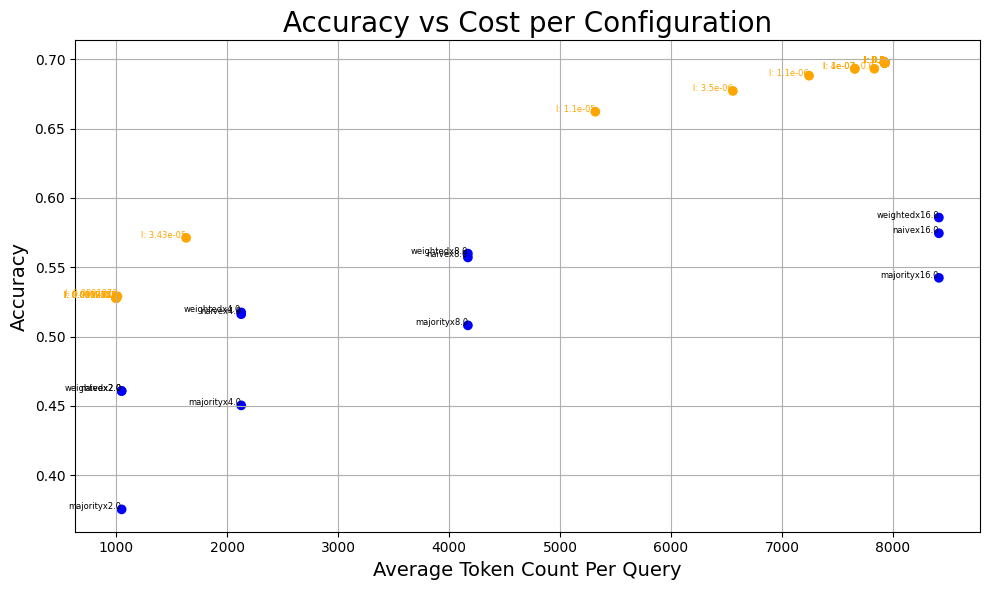

In [92]:
# Create color labels and text labels
colors = ['orange' if (row['method']) == -1 else 'blue'
          for _, row in query_optimal_static_df.iterrows()]

text_labels = ["qa" if (row['method']) == -1
               else f"{row['method']}x{row['N']}"
               for _, row in query_optimal_static_df.iterrows()]

print(text_labels)
plt.figure(figsize=(10, 6))
plt.scatter(query_optimal_static_df["token_count"], query_optimal_static_df["sl"], color=colors)

# Annotate each point
for i, label in enumerate(text_labels):
    if label != "qa":
        plt.annotate(label,
                    (query_optimal_static_df["token_count"][i], query_optimal_static_df["sl"][i]),
                    textcoords="offset points", xytext=(0, 0), ha='right', fontsize=6, color='black')
    elif label == "qa":
        plt.annotate(f"l: {round(query_optimal_static_df["lambda"][i], 7)}",
                    (query_optimal_static_df["token_count"][i], query_optimal_static_df["sl"][i]),
                    textcoords="offset points", xytext=(0, 0), ha='right', fontsize=6, color='orange')

plt.xlabel("Average Token Count Per Query", fontsize=14)
plt.ylabel("Accuracy", fontsize=14)
plt.title("Accuracy vs Cost per Configuration", fontsize=20)
plt.grid(True)
plt.tight_layout()

['majorityx1.0', 'naivex1.0', 'weightedx1.0', 'majorityx1.0', 'naivex1.0', 'weightedx1.0', 'majorityx1.0', 'naivex1.0', 'weightedx1.0', 'majorityx2.0', 'qa', 'majorityx4.0', 'naivex2.0', 'weightedx2.0', 'qa', 'naivex4.0', 'weightedx4.0', 'majorityx8.0', 'naivex8.0', 'weightedx8.0', 'majorityx16.0', 'qa', 'naivex16.0', 'naivex32.0', 'majorityx32.0', 'weightedx16.0', 'weightedx32.0', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa', 'qa']


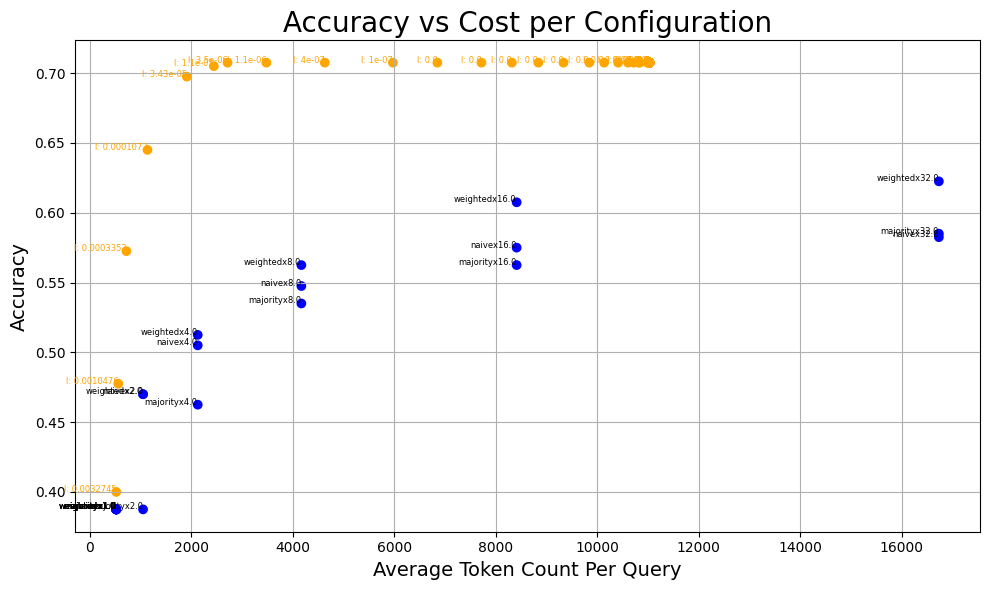

In [ ]:
# Create color labels and text labels
colors = ['orange' if (row['method']) == -1 else 'blue'
          for _, row in query_optimal_static_df.iterrows()]

text_labels = ["qa" if (row['method']) == -1
               else f"{row['method']}x{row['N']}"
               for _, row in query_optimal_static_df.iterrows()]

print(text_labels)
plt.figure(figsize=(10, 6))
plt.scatter(query_optimal_static_df["token_count"], query_optimal_static_df["indicator"], color=colors)

# Annotate each point
for i, label in enumerate(text_labels):
    if label != "qa":
        plt.annotate(label,
                    (query_optimal_static_df["token_count"][i], query_optimal_static_df["indicator"][i]),
                    textcoords="offset points", xytext=(0, 0), ha='right', fontsize=6, color='black')
    elif label == "qa":
        plt.annotate(f"l: {round(query_optimal_static_df["lambda"][i], 7)}",
                    (query_optimal_static_df["token_count"][i], query_optimal_static_df["indicator"][i]),
                    textcoords="offset points", xytext=(0, 0), ha='right', fontsize=6, color='orange')

plt.xlabel("Average Token Count Per Query", fontsize=14)
plt.ylabel("Accuracy", fontsize=14)
plt.title("Accuracy vs Cost per Configuration", fontsize=20)
plt.grid(True)
plt.tight_layout()

# plt.savefig("figs/accuracy_vs_cost_by_config3", dpi=300, bbox_inches='tight')

# notes: make sure we are plotting the accuracy. the probe should pick the weighted response.
# should not go below the blue dots. (check what you are actually plotting).